# Tutorial 5: Preconditioning

In [1]:
# Load packages:

# this package allows to work efficiently with arrays
import numpy as np
# this package is used to draw graphs
import matplotlib.pyplot as plt

We consider a stationnary iterative method that takes the form 

$$ V^{n+1} = A V^n + b$$

with $$A = \left( \begin{array}{cc} 1-\varepsilon & -1 \\ 0 & \frac{1}{2} \end{array}\right), \qquad b = \left( \begin{array}{c} 2 \\ 1\end{array} \right). $$

**Questions 1:**

Depending on the value of $\varepsilon$, is this sequence convergent and what does it converge to? 

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
From **Corollary 3.3**, the sequence defined iteratively by $V^{n+1}=A V^n+b$ converges for all initialization $V^0 \in \mathbb{R}^N$ iff $\rho(A)<1$.

In such a case, $\lim _{n \rightarrow \infty} V^n=(I-A)^{-1} b$.

Then, for matrix $A$ above, we have the eigenvalues $\lambda_1 = 1-\varepsilon$ and $\lambda_2 = \frac{1}{2}$. The spectral radius is then $\rho(A) = \max\left\{\left|1-\varepsilon\right|, \left|\frac{1}{2}\right|\right\}$. Therefore, if $\left| 1-\varepsilon \right|>1$, then the sequence diverges. If $\left| 1-\varepsilon \right|<1$, then the sequence converges to the unique solution of the linear system $A x = b$. We have:
$$
\begin{cases}
\varepsilon \in (-\infty, 0) \cap (0, \infty) \Rightarrow \rho(A) > 1 \Rightarrow \text{divergence} \\
\varepsilon \in (0, 2) \Rightarrow \rho(A) < 1 \Rightarrow \text{convergence}
\end{cases}
$$
We have then:
$$
I-A = \left( \begin{array}{cc} \varepsilon & 1 \\ 0 & \frac{1}{2} \end{array}\right)
$$
Finally, we have the limit:
$$
\lim _{n \rightarrow \infty} V^n=(I-A)^{-1} b = \frac{2}{\varepsilon} \begin{pmatrix} \frac{1}{2} & -1 \\ 0 & \varepsilon \end{pmatrix} \begin{pmatrix} 2 \\ 1 \end{pmatrix} = \frac{2}{\varepsilon} \begin{pmatrix} 0 \\ \varepsilon \end{pmatrix} = \begin{pmatrix} 0 \\ 2 \end{pmatrix}
$$

---

**Question 2:**

a) Implement this method in the following function.

b) Test it with the parameters above and with an initial value $V^0 = (0,0)^T$, $\varepsilon = \frac{1}{2}$ and $k_{max} = 100$ iterations.

c) Plot the error $\|V^n - V^\infty\|$ where $V^\infty$ is the converged value, as a function of $n$.

d) Test it again with $\varepsilon = \frac{1}{2^{10}}$ and $k_{max} = 10000$ iterations. Plot again the error, and interpret the difference.

In [71]:
def Stationnary_meth(A, U0, b, k_max):
    """
    Computes the iterations of the stationary iterative method
    ----------   
    parameters:
    A       : matrix of iteration (numpy array of size N,N)
    U0      : initial vector of the algorithm (numpy array of size N)
    b       : vector on ther right-hand-side (numpy array of size N)
    k_max   : number of iterations (integer)
    
    returns:
    U   : vector containing all the iterations (numpy array of size N x k_max)
    """
    U = []
    U.append(U0)
    for k in range(k_max - 1):
        U.append(np.dot(A, U[k]) + b)
    U = np.array(U)
    U = U.T

    return U[0]

In [73]:
# Test your algorithm here
###
epsilon = 1 / 2
A = np.array([[1 - epsilon, -1], [0, 1 / 2]])
b = np.array([[2], [1]])
###

U0 = np.array([[0], [0]])
k_max = 10000
U = Stationnary_meth(A, U0, b, k_max)
print('U = \n', U)
print('The size of U is ', U.shape)

U = 
 [[0.  2.  2.  ... 0.  0.  0. ]
 [0.  1.  1.5 ... 2.  2.  2. ]]
The size of U is  (2, 10000)


<Figure size 432x288 with 0 Axes>

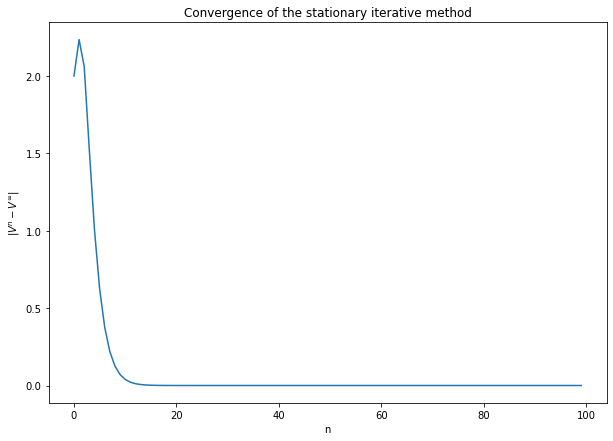

In [82]:
# c) plot norm(V_n - V_inf) as a function of n
def norm_V(A, U0, b, k_max):
    V = Stationnary_meth(A, U0, b, k_max)
    V_inf = np.array([[0], [2]])
    norm_V = np.linalg.norm(V - V_inf, axis=0)
    return norm_V


k_max = 100
norm_list = norm_V(A, U0, b, k_max)
# plot norm(V_n - V_inf) as a function of n
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(norm_list)
plt.xlabel('n')
plt.ylabel(r'$\|V^{n}-V^{\infty}\|$')
plt.title('Convergence of the stationary iterative method')
plt.show()


<Figure size 432x288 with 0 Axes>

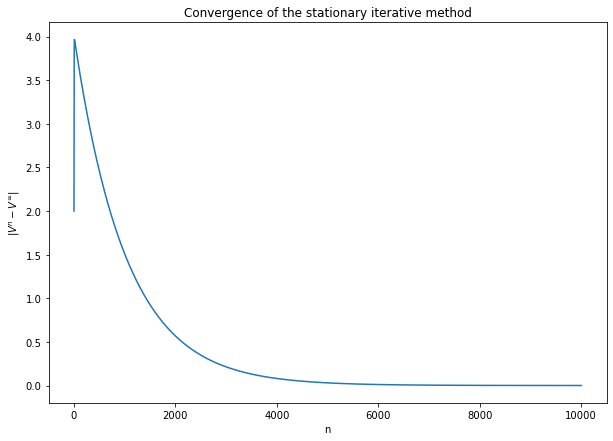

In [83]:
# d)
epsilon = 1 / 2**10
A = np.array([[1 - epsilon, -1], [0, 1 / 2]])
k_max = 10000
norm_list = norm_V(A, U0, b, k_max)
# plot norm(V_n - V_inf) as a function of n
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(norm_list)
plt.xlabel('n')
plt.ylabel(r'$\|V^{n}-V^{\infty}\|$')
plt.title('Convergence of the stationary iterative method')
plt.show()

**Question 3:**

Now we replace the matrix $A$ and the vector $b$ by

$$\tilde{A} = \left( \begin{array}{cc} 0 & -\frac{1}{\varepsilon} \\ 0 & 0 \end{array}\right), \qquad \tilde{b} = \left( \begin{array}{c} \frac{2}{\varepsilon} \\ 2 \end{array} \right). $$

a) Show that there exists a diagonal invertible matrix $D$ such that the problem in 1) correponds to 

$$\tilde{A} = I - D (Id-A), \qquad \tilde{b} = D b.$$

b) Deduce that $V^n$ converges toward the same solution as earlier, but faster.

<table>
<tr>   
<td bgcolor = lightblue ><font color = white >Answer</td>
</tr>
</table>

---
a) Since D is a diagonal invertible matrix, we assume $D=\begin{pmatrix}a & 0 \\ 0 & b\end{pmatrix}$. From the equation $\tilde{b} = D b$, we got 
$$
\begin{pmatrix}a & 0 \\ 0 & b\end{pmatrix} \begin{pmatrix} 2 \\ 1\end{pmatrix} = \begin{pmatrix} \frac{2}{\varepsilon} \\ 2\end{pmatrix}
$$
Then we got:
$$
\begin{cases}
a = \frac{1}{\varepsilon} \\
b = 2
\end{cases}
$$
Then we verify this on equation $\tilde{A} = I - D (Id-A)$, we have:
$$
I - D (Id-A) = \begin{pmatrix} 1 & 0 \\ 0 & 1\end{pmatrix} - \begin{pmatrix}\frac{1}{\varepsilon} & 0 \\ 0 & 2\end{pmatrix} \begin{pmatrix} \varepsilon & 1 \\ 0 & \frac{1}{2}\end{pmatrix} = \left( \begin{array}{cc} 0 & -\frac{1}{\varepsilon} \\ 0 & 0 \end{array}\right)
$$
Then the result is verified by $D=\begin{pmatrix}\frac{1}{\varepsilon} & 0 \\ 0 & 2\end{pmatrix}$

b)  We have the computtation:
$$
\lim _{n \rightarrow \infty} V^n=(I-A)^{-1} b = \begin{pmatrix} 1 & -\frac{1}{\varepsilon} \\ 0 & 1 \end{pmatrix} \left( \begin{array}{c} \frac{2}{\varepsilon} \\ 2 \end{array} \right) = \begin{pmatrix} 0 \\ 2 \end{pmatrix}
$$

---

**Question 4:**

Test your algorithm with those parameters. How fast doest it converges? 

<Figure size 432x288 with 0 Axes>

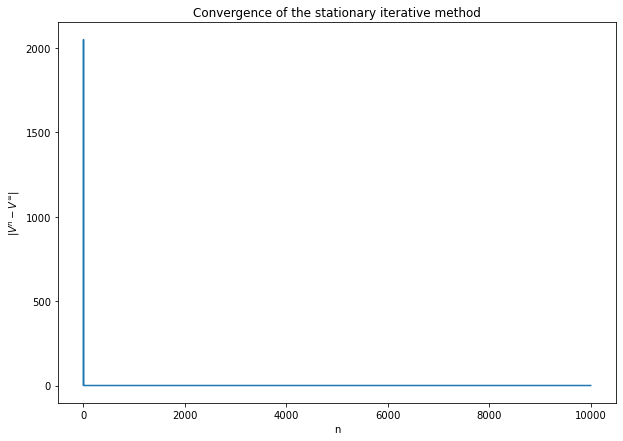

In [95]:
# Test your algorithm here
###
e = 1 / 2**10
A = np.array([[0, -1/epsilon], [0, 0]])
b = np.array([[2/epsilon], [2]])
###

U0 = np.array([[0], [0]])
k_max = 10000
norm_list = norm_V(A, U0, b, k_max)
# plot norm(V_n - V_inf) as a function of n
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(norm_list)
plt.xlabel('n')
plt.ylabel(r'$\|V^{n}-V^{\infty}\|$')
plt.title('Convergence of the stationary iterative method')
plt.show()

<Figure size 432x288 with 0 Axes>

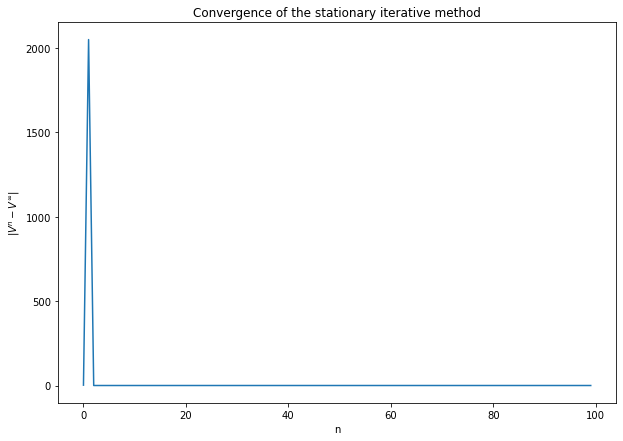

In [94]:
# Test your algorithm here
###
e = 1 / 2
A = np.array([[0, -1/epsilon], [0, 0]])
b = np.array([[2/epsilon], [2]])
###

U0 = np.array([[0], [0]])
k_max = 100
norm_list = norm_V(A, U0, b, k_max)
# plot norm(V_n - V_inf) as a function of n
plt.figure()
plt.figure(figsize=(10, 7))
plt.plot(norm_list)
plt.xlabel('n')
plt.ylabel(r'$\|V^{n}-V^{\infty}\|$')
plt.title('Convergence of the stationary iterative method')
plt.show()

From the plot above, we can see that the convergence is much faster than the previous one.

##### chat

write a function that least_sqaures regressino taking X,y and alpha,

##### response: 21 seconds elapsed



Here's an example implementation of a function that performs least squares regression using Python's NumPy library:

```python
import numpy as np

def least_squares_regression(X, y, alpha):
    """
    Perform least squares regression on the input data X and target variable y,
    using the regularization parameter alpha to control the degree of regularization.
    Returns the learned model parameters.
    """
    # Add a bias term to X
    X = np.hstack([np.ones((X.shape[0], 1)), X])
```
   

In [91]:
def least_squares_regression(X, y, alpha):
    """
    Perform least squares regression on the input data X and target variable y,
    using the regularization parameter alpha to control the degree of regularization.
    Returns the learned model parameters.
    """
    # Add a bias term to X
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    # Compute the model parameters
    XT_X = np.dot(X.T, X)
    XT_y = np.dot(X.T, y)
    return np.dot(np.linalg.inv(XT_X + alpha * np.eye(XT_X.shape[0])), XT_y)